# Correlations between Nuisances and Bins
This notebook plots the correlation matrix of the nuisances and/or the bins, using the outputs from running runcards.py and runcombine.py. 


### Bin-to-Bin Correlations
In order to check the bin-to-bin covariances and correlations, firstly, make a `fitDiagnostics.root` file by activating cmsenv and running any of

- `combine -M FitDiagnostics combined.root  -t -1 --expectSignal 0 --rMin -10 --forceRecreateNLL  --saveWithUncertainties --saveOverallShapes --numToysForShapes 200` (background only)
- `combine -M FitDiagnostics combined.root -t -1 --expectSignal 1 --forceRecreateNLL  --saveWithUncertainties --saveOverallShapes --numToysForShapes 200` (s+b only)
- `combine -M FitDiagnostics combined.root --forceRecreateNLL  --saveWithUncertainties --saveOverallShapes --numToysForShapes 200` (data)

You can use the script `getCovariances.sh` instead (from https://github.com/cericeci/combineScripts/blob/master/getCovariances.sh), and https://twiki.cern.ch/twiki/bin/viewauth/CMS/SUSPAGPreapprovalChecks for a nice walkthrough of the checks.


### Correlations between Nuisances
In to check the nuisance parameters correlations, the command, which produces `robustHesse.root`, is

- ` combine -M MultiDimFit combined.root -m 125 --robustHesse 1 --robustHesseSave 1 --saveFitResult`

See https://cms-analysis.github.io/HiggsAnalysis-CombinedLimit/tutorial2023/parametric_exercise/#correlations-between-parameters.

In [7]:
import os
import uproot
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

# one file for nuisances, one for bins
fbins = "../allYears_720_v6/cards-GluGluToSUEP_HT1000_T3p00_mS300.000_mPhi3.000_T3.000_modegeneric_TuneCP5_13TeV-pythia8/fitDiagnostics.root"  # replace with your actual ROOT file path
fnuisances = "../allYears_720_v6/cards-GluGluToSUEP_HT1000_T3p00_mS300.000_mPhi3.000_T3.000_modegeneric_TuneCP5_13TeV-pythia8/robustHesse.root"  # replace with your actual ROOT file path
saveToAN = True
dirAN = '/home/submit/'+os.environ['USER']+'/SUEP/AN-22-133/images/offline/{}.pdf'


fbins = uproot.open(fbins)
fnuisances = uproot.open(fnuisances)

In [8]:
# read in correlation matrix of the nuisances
corr = fnuisances['h_correlation'].to_numpy()[0]
xlabels = fnuisances['h_correlation'].axis(0).labels()
ylabels = fnuisances['h_correlation'].axis(1).labels()

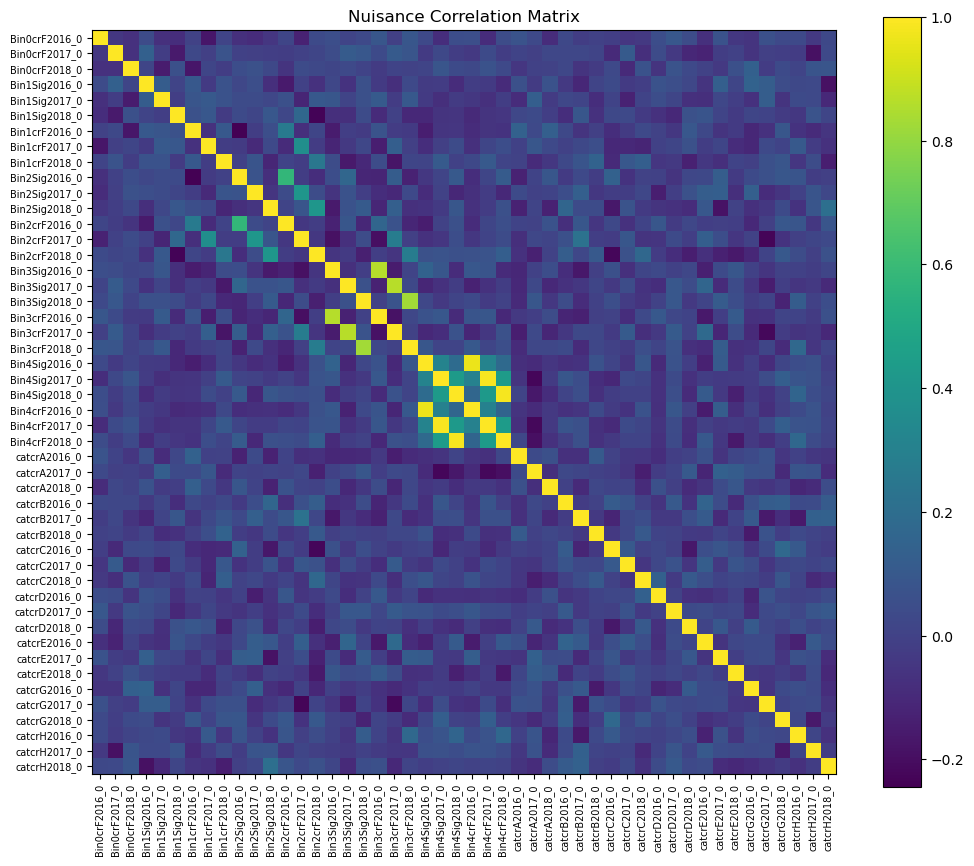

In [13]:
fig = plt.figure(figsize=(12,10))
ax = fig.subplots()
im = ax.imshow(corr)
ax.set_title("Nuisance Correlation Matrix")
fig.colorbar(im)
_ = ax.set_xticks(np.arange(0, len(xlabels)), xlabels, rotation = 90, fontsize=7)
_ = ax.set_yticks(np.arange(0, len(xlabels)), ylabels, fontsize=7)

if saveToAN: fig.savefig(dirAN.format("NuisanceCorrelationMatrix"))

In [14]:
# read in covariance matrix of the bins
cov = fbins['shapes_fit_s/overall_total_covar;1'].to_numpy()[0]
xlabels = fbins['shapes_fit_s/overall_total_covar;1'].axis(0).labels()
ylabels = fbins['shapes_fit_s/overall_total_covar;1'].axis(1).labels()

# calculate correlation matrix of the bins
corr = np.empty_like(cov)
for i in range(cov.shape[0]):
    for j in range(cov.shape[1]):
        corr[i,j] = cov[i,j]/np.sqrt(cov[i,i]*cov[j,j])

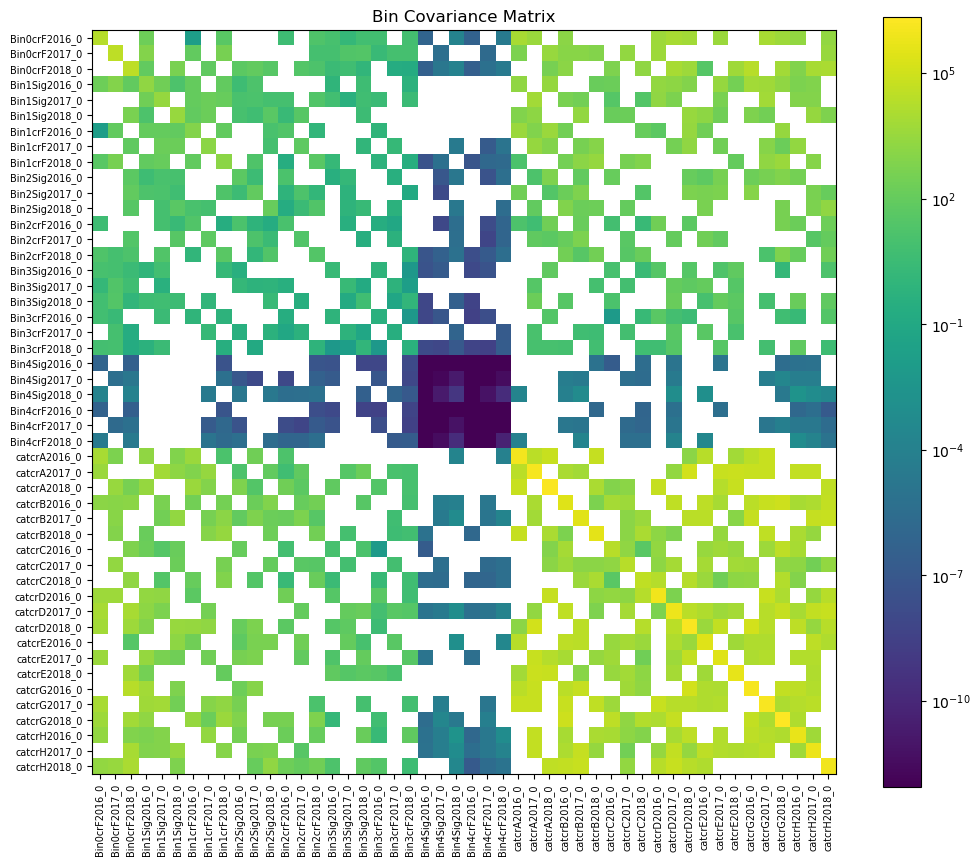

In [15]:
fig = plt.figure(figsize=(12,10))
ax = fig.subplots()
im = ax.imshow(cov,norm=colors.LogNorm())
fig.colorbar(im)
ax.set_title("Bin Covariance Matrix")
_ = ax.set_xticks(np.arange(0, len(xlabels)), xlabels, rotation = 90, fontsize=7)
_ = ax.set_yticks(np.arange(0, len(xlabels)), ylabels, fontsize=7)

if saveToAN: fig.savefig(dirAN.format("BinCovarianceMatrix"))

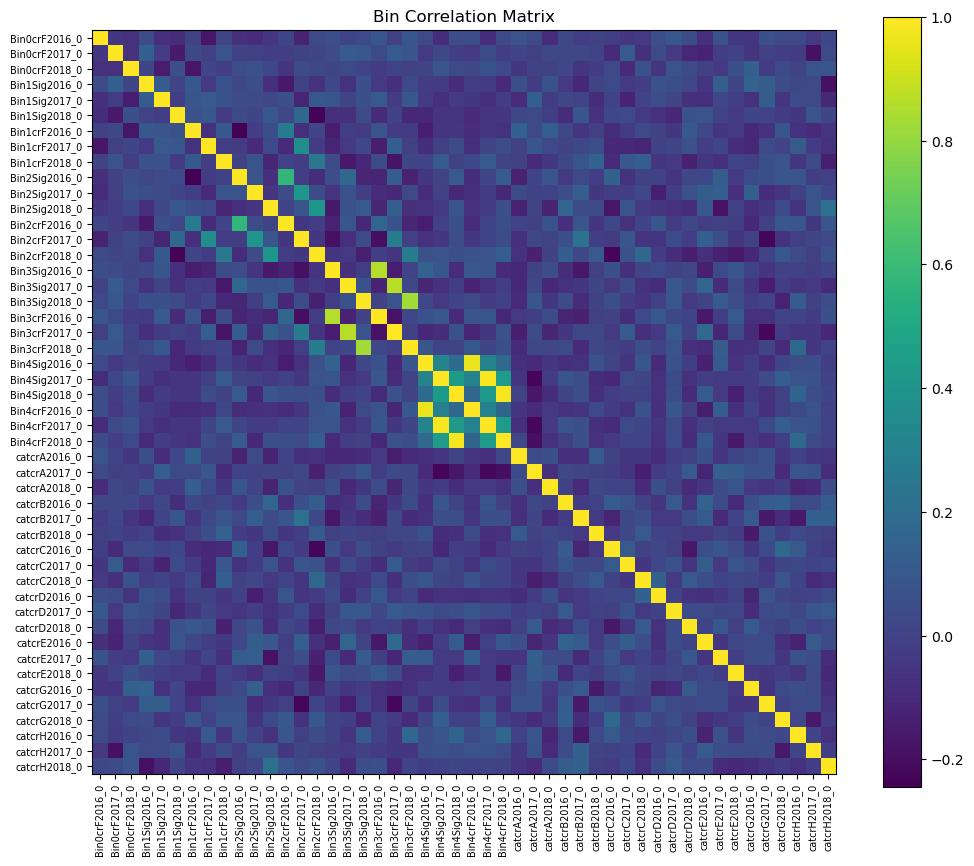

In [16]:
fig = plt.figure(figsize=(12,10))
ax = fig.subplots()
im = ax.imshow(corr)
ax.set_title("Bin Correlation Matrix")
fig.colorbar(im)
_ = ax.set_xticks(np.arange(0, len(xlabels)), xlabels, rotation = 90, fontsize=7)
_ = ax.set_yticks(np.arange(0, len(xlabels)), ylabels, fontsize=7)

if saveToAN: fig.savefig(dirAN.format("BinCorrelationMatrix"))